In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.6, 1.0),
                'colsample_bytree': Real(0.6, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

file_name = 'datos_preprocesados_Felipe_Agosto_2024.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
df_filtrado = df_filtrado.drop(columns=["ID","Sex","Educ","MMSE","Cat_MMSE","Cat_Educ","Site","Country","Eurolad_code","HDI","GINI","Group","Country_cat"])



In [5]:
# Verifica si hay algún valor nulo en el DataFrame
hay_nulos = df_filtrado.isnull().values.any()

if hay_nulos:
    print("El DataFrame contiene valores nulos.")
else:
    print("El DataFrame no contiene valores nulos.")
# Verifica cuántos valores nulos hay por columna
nulos_por_columna = df_filtrado.isnull().sum()
print(nulos_por_columna)


El DataFrame contiene valores nulos.
Unnamed: 0             0
Slope                  1
Knee                   1
Offset                 1
FD                     0
PE                     0
WMEAN                  0
SSV                    0
Delta_canon_RPD        0
Delta_canon_EPP        0
Theta_canon_RPD        0
Theta_canon_EPP        0
Alpha1_canon_RPD       0
Alpha1_canon_EPP       0
Alpha2_canon_RPD       0
Alpha2_canon_EPP       0
Beta1_canon_RPD        0
Beta1_canon_EPP        0
Beta2_canon_RPD        0
Beta2_canon_EPP        0
Beta3_canon_RPD        0
Beta3_canon_EPP        0
Gamma_canon_RPD        0
Gamma_canon_EPP        0
Delta_subj_spec_RPD    0
Delta_subj_spec_EPP    0
Theta_subj_spec_RPD    0
Theta_subj_spec_EPP    0
Low_subj_spec_RPD      0
Low_subj_spec_EPP      0
High_subj_spec_RPD     0
High_subj_spec_EPP     0
Beta_subj_spec_RPD     0
Beta_subj_spec_EPP     0
Gamma_subj_spec_RPD    0
Gamma_subj_spec_EPP    0
IAF                    0
TF                     0
Age          

In [6]:
# Verifica si hay alguna fila con valores nulos
filas_con_nulos = df_filtrado[df_filtrado.isnull().any(axis=1)]
print(filas_con_nulos)


     Unnamed: 0  Slope  Knee  Offset        FD        PE     WMEAN       SSV  \
410         689    NaN   NaN     NaN  1.410705  1.403053 -0.671298  0.072165   

     Delta_canon_RPD  Delta_canon_EPP  ...  Low_subj_spec_EPP  \
410         0.007556         0.143564  ...           0.006151   

     High_subj_spec_RPD  High_subj_spec_EPP  Beta_subj_spec_RPD  \
410            0.005985            0.053863            0.005099   

     Beta_subj_spec_EPP  Gamma_subj_spec_RPD  Gamma_subj_spec_EPP  IAF   TF  \
410             0.37224             0.003159             0.255863  8.0  8.0   

      Age  
410  52.0  

[1 rows x 39 columns]


In [7]:
df_filtrado_sin_nulos = df_filtrado.dropna()


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


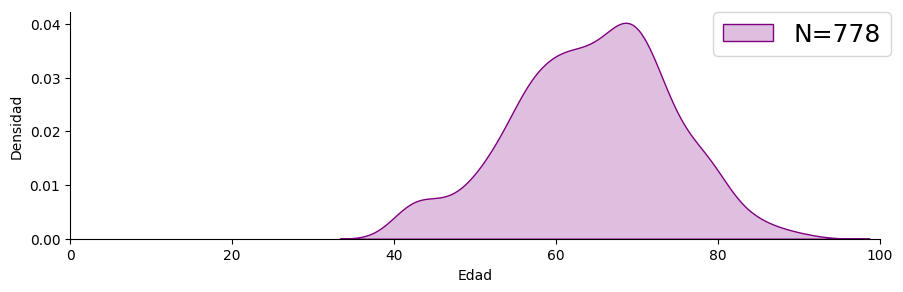

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Contar el número de personas en el DataFrame filtrado
num_personas = df_filtrado_sin_nulos.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(df_filtrado, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()

In [9]:
X = df_filtrado_sin_nulos.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado_sin_nulos["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)

In [ ]:
opt_xgb_1_electrode, best_params_xgb_1_electrode = xgb_model.search_best_model(n_iter_=400)


In [14]:
#with open('C:/Users/felipe/Documents/opt_XGB_model_40A_1_electrode.pickle', 'wb') as file:
#        pickle.dump(opt_xgb_1_electrode, file)

In [11]:
with open(f'{path}Opt_Model/opt_XGB_model_40A_1_electrode.pickle', 'rb') as file:
    opt_xgb_1_electrode= pickle.load(file)

C:\Users/felipe/Documents/Brain\base_regressor.py:254: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


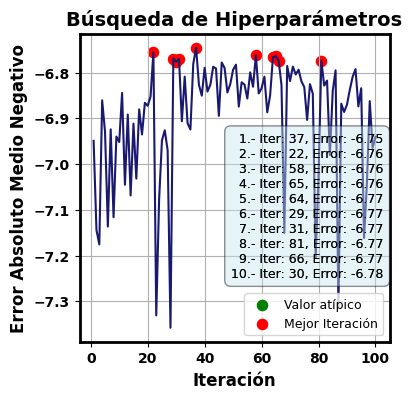

Top 1: Iteración 37, Error -6.745577799303374
Top 2: Iteración 22, Error -6.755630043428248
Top 3: Iteración 58, Error -6.76242828785834
Top 4: Iteración 65, Error -6.764103819929632
Top 5: Iteración 64, Error -6.766378288933147
Top 6: Iteración 29, Error -6.7692255582677605
Top 7: Iteración 31, Error -6.770040335413498
Top 8: Iteración 81, Error -6.773995284038023
Top 9: Iteración 66, Error -6.774111743737537
Top 10: Iteración 30, Error -6.776151581123067


In [12]:
xgb_model.plot_search_best_model(opt_xgb_1_electrode, linewidth=1.5, color='midnightblue', num_max=100)

In [13]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_1_electrode, num_max=100)

In [14]:
best_params_xgb

[{'colsample_bytree': 0.8519011969918635,
  'learning_rate': 0.01423398632529757,
  'max_depth': 4,
  'n_estimators': 439,
  'subsample': 0.7350674758023661},
 {'colsample_bytree': 0.8787796415602391,
  'learning_rate': 0.012185563890568603,
  'max_depth': 4,
  'n_estimators': 445,
  'subsample': 0.7196365685784316},
 {'colsample_bytree': 0.9708805163042077,
  'learning_rate': 0.030374633851843042,
  'max_depth': 8,
  'n_estimators': 3098,
  'subsample': 0.6},
 {'colsample_bytree': 0.9885781096366899,
  'learning_rate': 0.01,
  'max_depth': 6,
  'n_estimators': 360,
  'subsample': 0.6015263558742571},
 {'colsample_bytree': 0.8268310429935797,
  'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 326,
  'subsample': 0.6},
 {'colsample_bytree': 0.7461552508550054,
  'learning_rate': 0.017926524442729155,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.6758866302013601},
 {'colsample_bytree': 0.6189277873176051,
  'learning_rate': 0.016695326473264053,
  'max_depth': 10

In [37]:
xgb_model.fit_params_train = { }

In [12]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

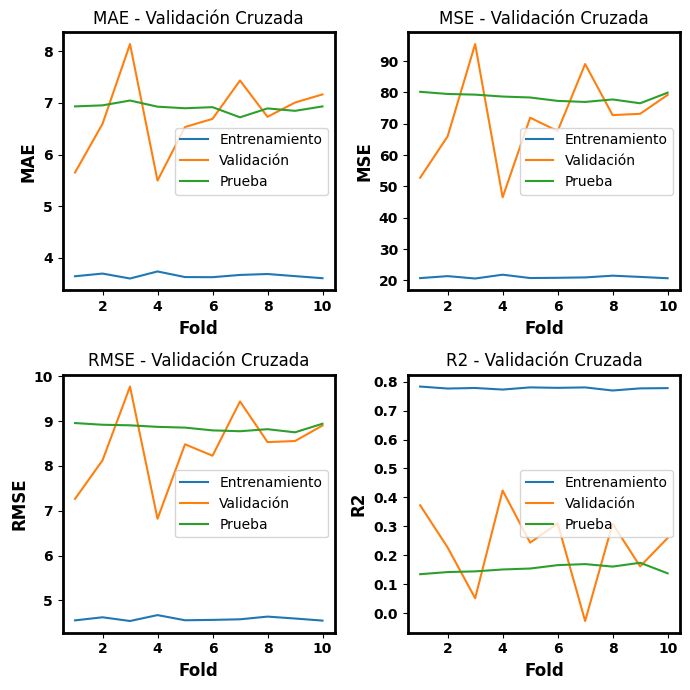

In [13]:
xgb_model.plot_metricas_evaluacion(results)

In [14]:
y_pred=xgb_model.predicter(xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     32.41
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           6.13e-08
Time:                        22:02:40   Log-Likelihood:                -466.14
No. Observations:                 156   AIC:                             936.3
Df Residuals:                     154   BIC:                             942.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8444      2.590     19.242      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


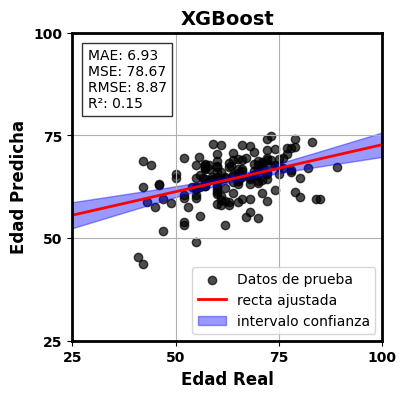

Error medio absoluto: 6.928347938081138
Error cuadrático medio: 78.6656970593215
Raíz del error cuadrático medio: 8.869368470151722
Coeficiente de determinación (R²): 0.15077707340332125


In [15]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [16]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2417.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          4.57e-216
Time:                        22:03:01   Log-Likelihood:                -1548.1
No. Observations:                 622   AIC:                             3100.
Df Residuals:                     620   BIC:                             3109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3106      0.786     33.453      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


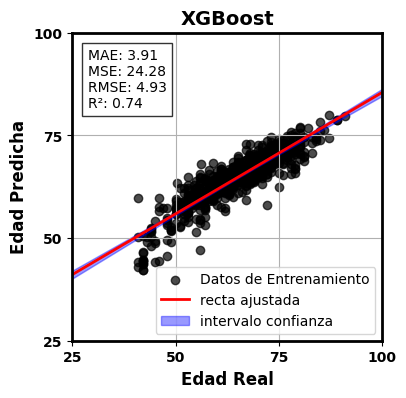

Error medio absoluto: 3.909175725611843
Error cuadrático medio: 24.278762871611654
Raíz del error cuadrático medio: 4.927348462572102
Coeficiente de determinación (R²): 0.7434112703484548


In [17]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [18]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1151.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.08e-143
Time:                        22:03:16   Log-Likelihood:                -1548.1
No. Observations:                 622   AIC:                             3100.
Df Residuals:                     620   BIC:                             3109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3106      0.786     33.453      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


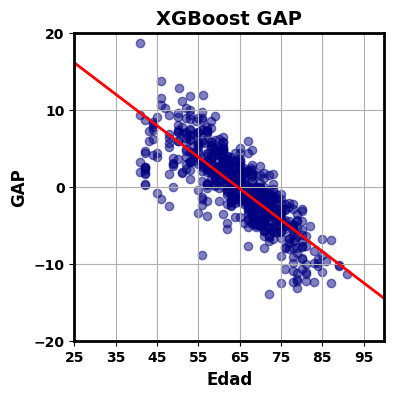

Error medio absoluto: 64.68346985615591
Error cuadrático medio: 4380.114082465272
Raíz del error cuadrático medio: 66.1824303154944
Coeficiente de determinación (R²): -45.290987481192154


In [19]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=25,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [20]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     251.2
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.65e-34
Time:                        22:03:20   Log-Likelihood:                -466.14
No. Observations:                 156   AIC:                             936.3
Df Residuals:                     154   BIC:                             942.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5339      2.590      9.085      0.0

c:\Users\felipe\Documents\Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


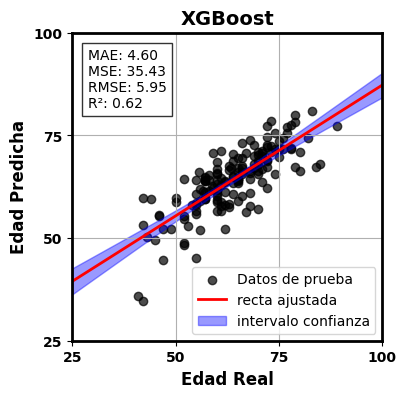

Error medio absoluto: 4.600284386016864
Error cuadrático medio: 35.434618701273884
Raíz del error cuadrático medio: 5.952698438630491
Coeficiente de determinación (R²): 0.6174712521311414


In [21]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

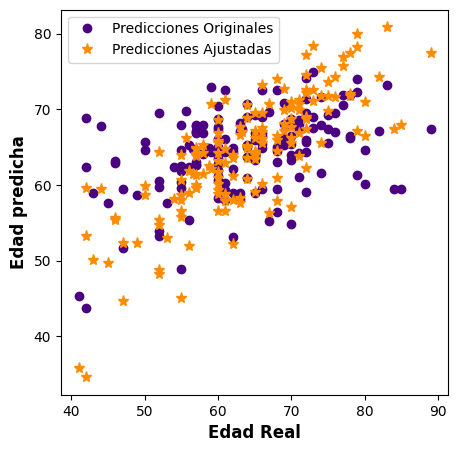

In [22]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(xgb_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(xgb_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

# Early Stopping

In [15]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 5,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

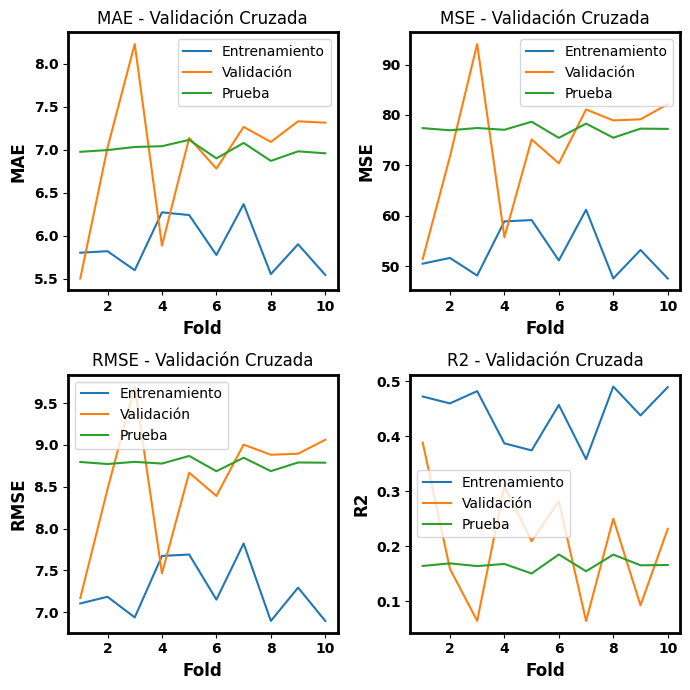

In [17]:
xgb_model.plot_metricas_evaluacion(results)

In [18]:
y_pred=xgb_model.predicter(xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     33.19
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           4.41e-08
Time:                        13:31:42   Log-Likelihood:                -405.56
No. Observations:                 156   AIC:                             815.1
Df Residuals:                     154   BIC:                             821.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.6737      1.757     31.121      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


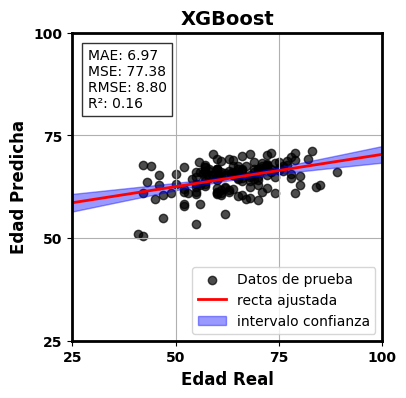

Error medio absoluto: 6.974514724861862
Error cuadrático medio: 77.38169389881371
Raíz del error cuadrático medio: 8.796686529529952
Coeficiente de determinación (R²): 0.16463832376386323


In [19]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [20]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     847.7
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          4.06e-118
Time:                        13:31:46   Log-Likelihood:                -1497.7
No. Observations:                 622   AIC:                             2999.
Df Residuals:                     620   BIC:                             3008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.7663      0.725     60.351      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


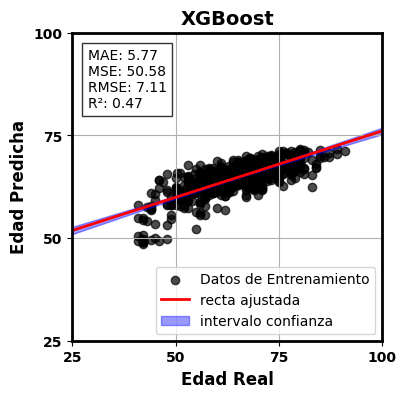

Error medio absoluto: 5.771526753710781
Error cuadrático medio: 50.57700267136624
Raíz del error cuadrático medio: 7.111751027093555
Coeficiente de determinación (R²): 0.46547981321557297


In [21]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train, label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [22]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     3719.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          3.84e-264
Time:                        13:31:50   Log-Likelihood:                -1497.7
No. Observations:                 622   AIC:                             2999.
Df Residuals:                     620   BIC:                             3008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.7663      0.725     60.351      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


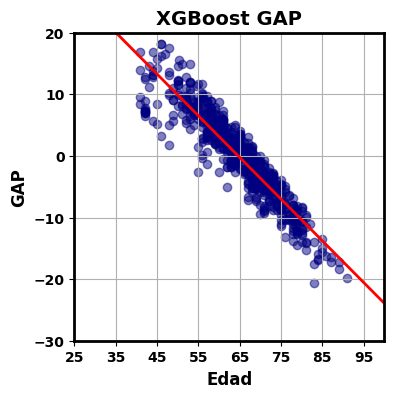

Error medio absoluto: 64.57988934450468
Error cuadrático medio: 4443.849605075667
Raíz del error cuadrático medio: 66.66220522211718
Coeficiente de determinación (R²): -45.96457274032414


In [23]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=25,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [24]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     935.3
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           2.63e-67
Time:                        13:31:54   Log-Likelihood:                -405.56
No. Observations:                 156   AIC:                             815.1
Df Residuals:                     154   BIC:                             821.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9073      1.757      6.209      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


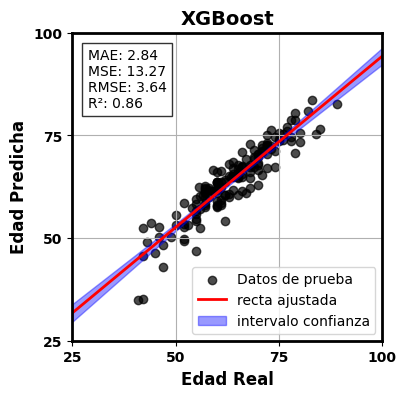

Error medio absoluto: 2.8368998147203235
Error cuadrático medio: 13.271187598743404
Raíz del error cuadrático medio: 3.6429641226264367
Coeficiente de determinación (R²): 0.856733020956776


In [25]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test, label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

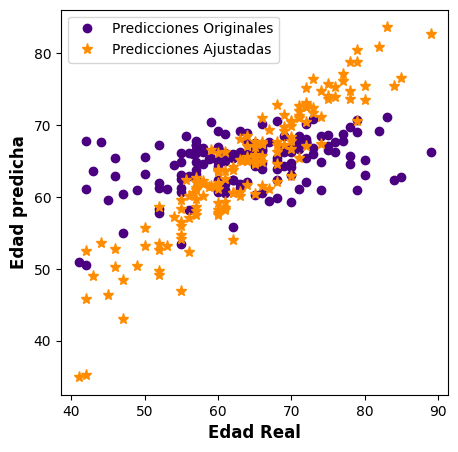

In [26]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(xgb_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(xgb_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [27]:
with open(f'{path}Brain_Age/Age_Array/xgb_edad_predicha_array_1electrode_40A.pickle', 'wb') as file:
        pickle.dump(y_pred, file)